In [1]:
%matplotlib inline

# MeatNet: World meat consumption

In this notebook we want to obtain the plot of evolution of the meat consumption in the world. We are using the data from the FAO (Food and Agriculture Organization of th United Nations), available in their web page [FAOSTAT](http://www.fao.org/faostat/)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import gdown

In [3]:
gdown.download('https://drive.google.com/uc?id=1PUl07-a-scy7iuo6VTTNWwYaxI8o4N0H')

Downloading...
From: https://drive.google.com/uc?id=1PUl07-a-scy7iuo6VTTNWwYaxI8o4N0H
To: /home/daniel/Carnes/MeatNet/MeatConsumptionFAOSTAT.xlsx
100%|██████████| 30.5k/30.5k [00:00<00:00, 3.54MB/s]


'MeatConsumptionFAOSTAT.xlsx'

In [4]:
df = pd.read_excel('MeatConsumptionFAOSTAT.xlsx')

In [5]:
df

,Domain,Country,Element,Item,Year,Unit,Value
0,Food Supply - Livestock and Fish Primary Equiv...,World,Food supply quantity (tonnes),Meat,1961,tonnes,70342253.38
1,Food Supply - Livestock and Fish Primary Equiv...,World,Food supply quantity (tonnes),Meat,1962,tonnes,73665896.39
2,Food Supply - Livestock and Fish Primary Equiv...,World,Food supply quantity (tonnes),Meat,1963,tonnes,77587573.64
3,Food Supply - Livestock and Fish Primary Equiv...,World,Food supply quantity (tonnes),Meat,1964,tonnes,79130730.29
4,Food Supply - Livestock and Fish Primary Equiv...,World,Food supply quantity (tonnes),Meat,1965,tonnes,83043471.42
...,...,...,...,...,...,...,...
525,Food Supply - Livestock and Fish Primary Equiv...,Oceania,Food supply quantity (tonnes),Meat,2009,tonnes,3037768.18
526,Food Supply - Livestock and Fish Primary Equiv...,Oceania,Food supply quantity (tonnes),Meat,2010,tonnes,3042565.72
527,Food Supply - Livestock and Fish Primary Equiv...,Oceania,Food supply quantity (tonnes),Meat,2011,tonnes,3435886.98
528,Food Supply - Livestock and Fish Primary Equiv...,Oceania,Food supply quantity (tonnes),Meat,2012,tonnes,3288079.86


In [6]:
years = np.array(df[df.Country=='World'].Year)

In [7]:
regions = ['World', 'Europe', 'Americas', 'Asia', 'Africa', 'Oceania']

In [8]:
region_data = np.empty((len(regions), years.shape[0]))
for i, region in enumerate(regions):
    region_data[i, :] = np.array(df[df.Country==region].Value)

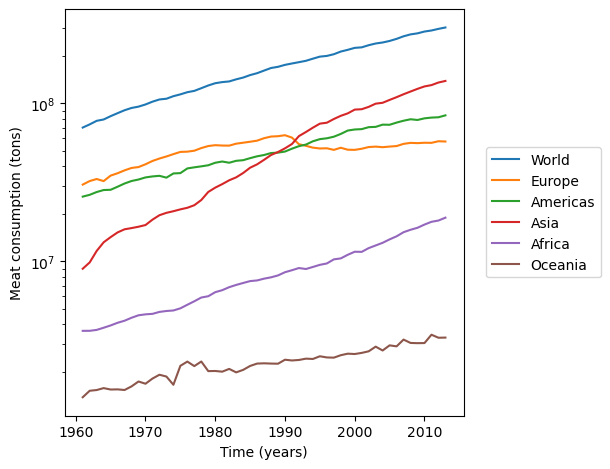

In [9]:
for i, region in enumerate(regions):
    plt.semilogy(years, region_data[i,:], label=region)
    
plt.legend(loc='center', ncol=1, bbox_to_anchor=(1.2,0.5))
plt.ylabel('Meat consumption (tons)')
plt.xlabel('Time (years)')

plt.tight_layout()

plt.savefig('meat-consumption.png', dpi=600)